In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.float_format ='{:,.3f}'.format #установка формата чисел, чтобы избежать значения с е

In [2]:
data = pd.read_csv('owid-covid-data.csv')
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.000,5.000,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.000,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.000,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.000,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.000,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209979,ZWE,Africa,Zimbabwe,2022-08-15,"256,544.000",5.000,8.143,"5,588.000",0.000,0.571,...,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
209980,ZWE,Africa,Zimbabwe,2022-08-16,"256,561.000",17.000,10.143,"5,588.000",0.000,0.286,...,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
209981,ZWE,Africa,Zimbabwe,2022-08-17,"256,565.000",4.000,10.429,"5,588.000",0.000,0.143,...,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
209982,ZWE,Africa,Zimbabwe,2022-08-18,"256,579.000",14.000,9.429,"5,589.000",1.000,0.286,...,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN


In [3]:
data.shape

(209984, 67)

База данных OWID имеет 67 переменных (столбцов). 

In [4]:
info = pd.read_csv('owid-covid-codebook.csv')
info = info.drop(['source'], axis=1)
info

,column,category,description
0,iso_code,Others,ISO 3166-1 alpha-3 – three-letter country code...
1,continent,Others,Continent of the geographical location
2,location,Others,Geographical location. Location 'International...
3,date,Others,Date of observation
4,total_cases,Confirmed cases,Total confirmed cases of COVID-19. Counts can ...
...,...,...,...
62,human_development_index,Others,A composite index measuring average achievemen...
63,excess_mortality,Excess mortality,Percentage difference between the reported num...
64,excess_mortality_cumulative,Excess mortality,Percentage difference between the cumulative n...
65,excess_mortality_cumulative_absolute,Excess mortality,Cumulative difference between the reported num...


**Чтобы облегчить понимание работы, вот значение каждой переменной, разделенное по категориям**

* Общая категория / другие
|`Атрибут`|`Описание`|
|:-------|:---------|
|iso_code|3-буквенный код страны, определенный в соответствии со стандартом ISO 3166-1 alpha-3.|
|continent|Страна или регион континент|
|location|Название страны или региона|
|date|дата наблюдения|
|population|Население в 2020 году|
|population_density|Количество людей, разделенное по площади земли, измеренное в квадратных километрах, за последний год|
|median_age|Средний возраст населения по прогнозу ООН на 2020 г.|
|aged_65_older|Доля населения в возрасте 65 лет и старше с учетом последнего доступного года|
|aged_70_older|Доля населения в возрасте 70 лет и старше в 2015 г.|
|gdp_per_capita|Валовой внутренний продукт на душу населения за последний год, по которому имеются данные|
|extreme_poverty|Доля населения, живущего в условиях крайней нищеты, за последний год, доступный с 2010 г.|
|cardiovasc_death_rate|Смертность от сердечно-сосудистых заболеваний в 2017 г. (годовое число умерших на 100 000 населения)|
|diabetes_prevalence|Распространенность диабета (% населения в возрасте от 20 до 79 лет) в 2017 г.|
|female_smokers|Доля курящих женщин, данные за последний год|
|male_smokers|Доля курящих мужчин, данные за последний год|
|handwashing_facilities|Доля населения, имеющего базовые приспособления для мытья рук, данные за последний год|
|Hospital_beds_per_thousand|Больничные койки на 1000 человек, последний год доступности с 2010 г.|
|life_expectancy|Ожидаемая продолжительность жизни при рождении в 2019 году|
|human_development_index|Составной индекс, измеряющий средние показатели по трем основным параметрам человеческого развития: долгая и здоровая жизнь,знания и достойный уровень жизни. Ценности на 2019 год|


* Cases

|`Атрибут`|`Описание`|
|:-------|:---------|
|total cases|Всего подтвержденных случаев COVID-19|
|new cases|Новые подтвержденные случаи COVID-19.|
|new cases smoothed|Новые подтвержденные случаи (7-дневная скользящая средняя).|
|total cases per_million|Всего случаев COVID-19 на миллион человек.|
|new cases per_million|Новые подтвержденные случаи COVID-19 на миллион человек.|
|new cases smoothed per_million|Новые подтвержденные случаи COVID-19 на миллион человек (скользящее среднее за 7 дней).|


* Deaths

|`Атрибут`|`Описание`|
|:-------|:---------|
|total_deaths|Всего смертей от COVID-19.|
|new_deaths|Новые смерти, связанные с COVID-19.|
|new_deaths_smoothed|Новые смерти, связанные с COVID-19 (скользящее среднее за 7 дней).|
|total_deaths_per_million|Всего смертей от COVID-19 на миллион человек.|
|new_deaths_per_million|Число новых смертей от COVID-19 на миллион человек.|
|new_deaths_smoothed_per_million|Новые случаи смерти от COVID-19 на миллион человек (7-дневное скользящее среднее).|


* Коэффициент распространения

`reproduction_rate` - Оценка эффективной скорости размножения (R) COVID-19 в режиме реального времени.


* Госпитализация и терапия

|`Атрибут`|`Описание`|
|:-------|:---------|
|icu_patients|	Количество пациентов с COVID-19 в отделениях интенсивной терапии (ОИТ) в данный день|
|icu_patients_per_million|	Количество пациентов с COVID-19 в отделениях интенсивной терапии (ОИТ) в данный день на миллион человек|
|hosp_patients|	Количество пациентов, госпитализированных за сутки|
|hosp_patients_per_million|	Количество пациентов, госпитализированных в данный день, на миллион человек|
|weekly_icu_admissions|	Количество новых пациентов отделения интенсивной терапии за данную неделю.|
|weekly_icu_admissions_per_million|	Количество новых пациентов отделения интенсивной терапии за данную неделю на миллион человек|
|weekly_hosp_admissions|	Количество новых пациентов с COVID-19, госпитализированных за данную неделю.|
|weekly_hosp_admissions_per_million|	Количество новых пациентов с COVID-19, госпитализированных за данную неделю, на миллион человек|


* Вакцинация

|`Атрибут`|`Описание`|
|:-------|:---------|
| total_vaccinations | Всего введено вакцин
| people_vaccinated | Общее количество людей, получивших хотя бы одну дозу вакцины
| people_fully_vaccinated | Общее количество людей, получивших все дозы, предусмотренные протоколами вакцинации
| total_boosters | Количество доз, введенных дополнительно к предусмотренным в протоколе начальной вакцинации
| new_vaccinations | Введены новые дозы вакцин (учитываются только дни подряд)
| new_vaccinations_smoothed | Новые дозы введенных вакцин (7-дневное скользящее среднее)
| total_vaccinations_per_hundred | Количество вводимых доз на 100 человек
| people_vaccinated_per_hundred | Общее количество людей, получивших хотя бы одну дозу вакцины на 100 человек
| people_fully_vaccinated_per_hundred | Всего человек, получивших все дозы, предусмотренные протоколом вакцинации, на 100 человек
| total_boosters_per_hundred |Количество доз, вводимых дополнительно к предусмотренным протоколом первичной вакцинации (бустерные дозы) на 100 человек
| new_vaccinations_smoothed_per_million | Количество введенных новых доз вакцины (7-дневное скользящее среднее) на миллион человек
| new_people_vaccinated_smoothed | Количество людей, получивших первую дозу (7-дневное скользящее среднее)
| new_people_vaccinated_smoothed_per_hundred | Количество людей, получивших первую дозу (7-дневное скользящее среднее) на 100 человек

In [5]:
data['date'] = pd.to_datetime(data.date)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209984 entries, 0 to 209983
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    209984 non-null  object        
 1   continent                                   197857 non-null  object        
 2   location                                    209984 non-null  object        
 3   date                                        209984 non-null  datetime64[ns]
 4   total_cases                                 201448 non-null  float64       
 5   new_cases                                   201197 non-null  float64       
 6   new_cases_smoothed                          200020 non-null  float64       
 7   total_deaths                                182633 non-null  float64       
 8   new_deaths                                  182612 non-null  float64      

Организация данных

In [7]:
#узнаем последнюю дату из данного датасета
latest_date = data['date'].iat[-1]

In [8]:
latest_date

Timestamp('2022-08-19 00:00:00')

В загруженной базе данных есть данные до 19 августа 2022 года. 
Чтобы иметь только закрытые месяцы, поставим последней датой 31 июля 2022 года

In [9]:
from datetime import datetime
latest_date = datetime.fromisoformat('2022-07-31')
latest_date

datetime.datetime(2022, 7, 31, 0, 0)

In [10]:
data = data.loc[data['date'] <= latest_date]

In [11]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.000,5.000,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.000,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.000,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.000,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.000,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209960,ZWE,Africa,Zimbabwe,2022-07-27,"256,315.000",31.000,18.286,"5,574.000",0.000,0.857,...,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
209961,ZWE,Africa,Zimbabwe,2022-07-28,"256,336.000",21.000,17.000,"5,576.000",2.000,0.857,...,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
209962,ZWE,Africa,Zimbabwe,2022-07-29,"256,376.000",40.000,22.714,"5,577.000",1.000,1.000,...,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
209963,ZWE,Africa,Zimbabwe,2022-07-30,"256,376.000",0.000,18.571,"5,577.000",0.000,0.714,...,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN


In [12]:
#отсортируем в порядке возрастания даты
data_sorted = data.sort_values(['date'],ascending= True)

In [13]:
data_sorted

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121659,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,6.900,21.400,87.847,1.380,75.050,0.779,NaN,NaN,NaN,NaN
7190,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,16.200,27.700,NaN,5.000,76.670,0.845,NaN,NaN,NaN,NaN
121660,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,6.900,21.400,87.847,1.380,75.050,0.779,NaN,NaN,NaN,NaN
7191,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,16.200,27.700,NaN,5.000,76.670,0.845,NaN,NaN,NaN,NaN
121661,MEX,North America,Mexico,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,6.900,21.400,87.847,1.380,75.050,0.779,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43610,CRI,North America,Costa Rica,2022-07-31,"1,028,375.000",0.000,"5,594.571","8,720.000",0.000,7.143,...,6.400,17.400,83.841,1.130,80.280,0.810,NaN,NaN,NaN,NaN
124975,MCO,Europe,Monaco,2022-07-31,"14,059.000",0.000,13.571,61.000,0.000,0.000,...,NaN,NaN,NaN,13.800,86.750,NaN,156.100,12.430,9.660,"4,255.029"
198811,USA,North America,United States,2022-07-31,"91,354,680.000","12,127.000","132,596.714","1,030,272.000",11.000,429.143,...,19.100,24.600,NaN,2.770,78.860,0.926,NaN,NaN,NaN,NaN
103750,LAO,Asia,Laos,2022-07-31,"211,239.000",47.000,64.286,757.000,0.000,0.000,...,7.300,51.200,49.839,1.500,67.920,0.613,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

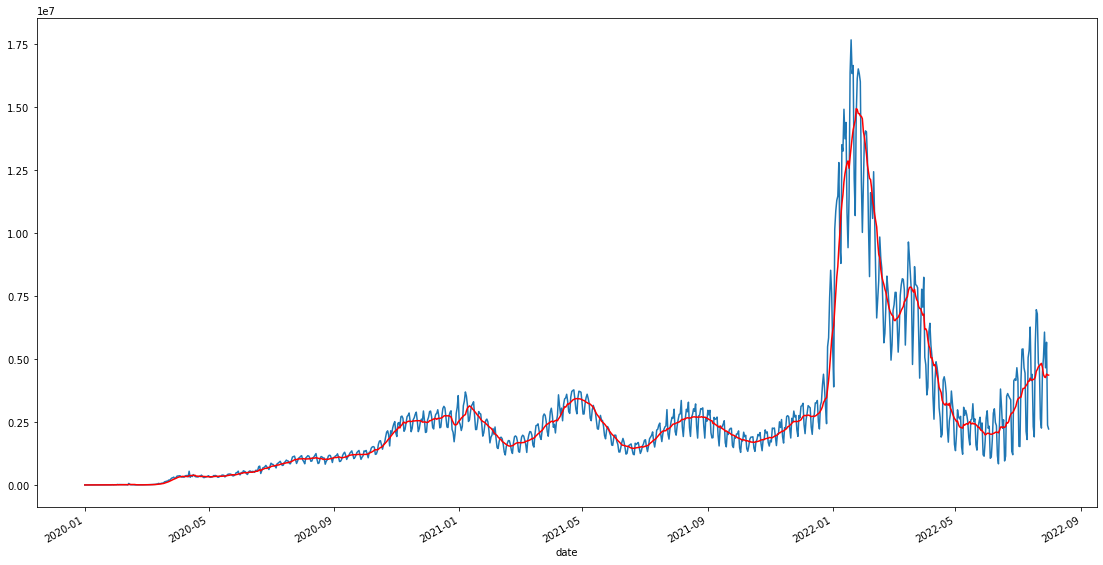

In [156]:
plt.figure(figsize=(19,10))
data_sorted.groupby('date').sum()['new_cases'].plot(x_compat=True)
data_sorted.groupby('date').sum()['new_cases_smoothed'].plot(color='red')

Посмотрим на список всех имеющихся континентов 

In [15]:
pd.unique(data['continent'])

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

и на список стран

In [16]:
data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

можно посчитать кол-во случаев для каждого континента

In [109]:
view = data.groupby('continent').sum()['new_cases'].reset_index().sort_values(by='new_cases',ascending=False)
view.style.background_gradient()

,continent,new_cases
2,Europe,217228440.000000
1,Asia,164935760.000000
3,North America,108379847.000000
5,South America,62084514.000000
0,Africa,12241411.000000
4,Oceania,11425776.000000


In [18]:
view = data.groupby('location').count()['new_cases'].reset_index().sort_values(by='new_cases',ascending=False)
view.style.background_gradient()

,location,new_cases
125,Lower middle income,922
11,Asia,922
240,World,922
231,Upper middle income,922
92,High income,922
157,North America,922
202,South Korea,921
127,Macao,921
69,European Union,921
68,Europe,921


#### Оценка отсутствия данных

In [19]:
categories = info['category'].unique()

columns_per_category = {}

for x in categories:
    columns_per_category[x] = tuple(info.loc[info['category'] == x]['column'])


for x in columns_per_category:
    print(f'{x.upper():^30}')
    print((data[list(columns_per_category[x])].isnull().sum() / data.shape[0]).sort_values(ascending=False))
    print()

            OTHERS            
handwashing_facilities       0.596
extreme_poverty              0.465
male_smokers                 0.387
female_smokers               0.378
hospital_beds_per_thousand   0.270
human_development_index      0.200
aged_65_older                0.185
aged_70_older                0.180
gdp_per_capita               0.180
cardiovasc_death_rate        0.178
median_age                   0.176
diabetes_prevalence          0.137
population_density           0.110
life_expectancy              0.065
continent                    0.058
population                   0.006
date                         0.000
location                     0.000
iso_code                     0.000
dtype: float64

       CONFIRMED CASES        
new_cases_smoothed_per_million   0.052
new_cases_smoothed               0.048
new_cases_per_million            0.046
total_cases_per_million          0.046
new_cases                        0.042
total_cases                      0.041
dtype: float64

       

Мы видим, что доля отсутствующих данных выше в категориях, касающихся госпитализаций, анализов, прививок и избыточной смертности. В каждой категории есть причины отсутствия (все они описаны в официальном репозитории и обобщены ниже):

госпитализации : данные получены только из европейских стран и из нескольких стран на других континентах, таких как США. Из-за этого ограничения анализы с такими данными не будут выполняться в данном исследовании.

тесты : все еще есть страны без официальных данных тестирования. Кроме того, каждая страна принимает свой график публикации данных тестирования, так что сама база данных обновляется только еженедельно. Наконец, не все формы тестирования рассматриваются для включения в базу данных.

прививки : есть страны без официальных данных. Кроме того, каждая страна принимает свой график публикации данных. И, очевидно, вакцинация началась только в конце 2020 года, поэтому более ранние даты не имеют записей о прививках.

избыточная смертность : в зависимости от страны число сообщается еженедельно или ежемесячно, поэтому записи на разные даты отсутствуют. Несколько стран не соответствуют необходимым критериям для включения, не имея записей в базе данных.

# Подлатать что выше

In [20]:
world_data = data[data['location'] == 'World']
world_data_2 = world_data.drop(['iso_code','continent'], axis=1).set_index('date')
world_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
206413,OWID_WRL,NaN,World,2020-01-22,557.000,0.000,NaN,17.000,0.000,NaN,...,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN
206414,OWID_WRL,NaN,World,2020-01-23,657.000,100.000,NaN,18.000,1.000,NaN,...,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN
206415,OWID_WRL,NaN,World,2020-01-24,944.000,287.000,NaN,26.000,8.000,NaN,...,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN
206416,OWID_WRL,NaN,World,2020-01-25,"1,437.000",493.000,NaN,42.000,16.000,NaN,...,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN
206417,OWID_WRL,NaN,World,2020-01-26,"2,120.000",683.000,NaN,56.000,14.000,NaN,...,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207330,OWID_WRL,NaN,World,2022-07-27,"573,823,799.000","1,407,972.000","1,000,387.000","6,393,329.000","4,457.000","2,328.286",...,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN
207331,OWID_WRL,NaN,World,2022-07-28,"574,919,390.000","1,095,591.000","995,592.571","6,395,941.000","2,612.000","2,365.429",...,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN
207332,OWID_WRL,NaN,World,2022-07-29,"576,276,078.000","1,356,694.000","1,035,148.286","6,398,842.000","2,901.000","2,383.571",...,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN
207333,OWID_WRL,NaN,World,2022-07-30,"576,850,082.000","574,004.000","1,026,375.429","6,399,834.000",992.000,"2,364.571",...,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

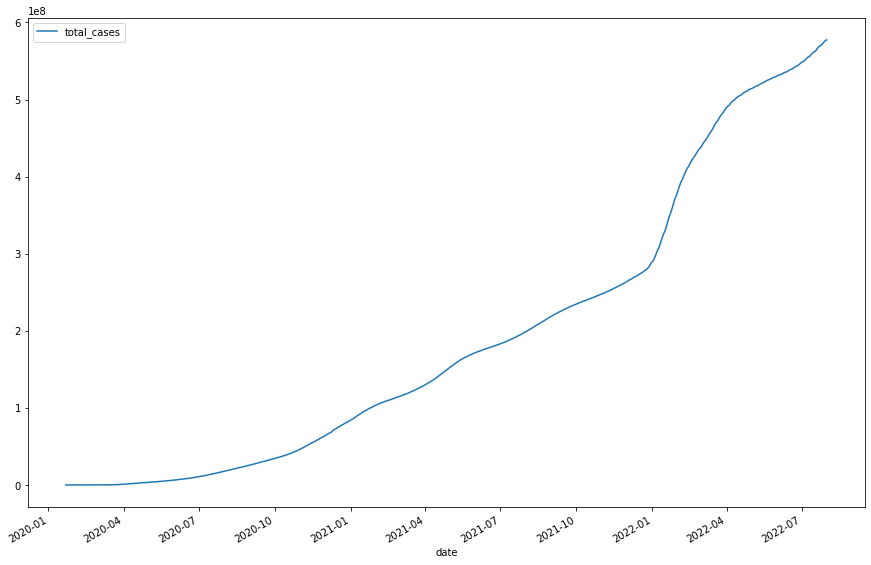

In [21]:
world_data.plot(x='date', y = 'total_cases', figsize=(15,10), x_compat = True)

In [22]:
import calendar
world_data_2['month'] = world_data_2.index.month
world_data_2['year'] = world_data_2.index.year

df = pd.pivot_table(world_data_2, values="new_cases",
                                   index=["month"],
                                   columns=["year"],
                                   fill_value=0)
month_index = [month for month in calendar.month_abbr if month]

df = df.set_index([month_index])
df

year,2020,2021,2022
Jan,937.000,"630,824.226","2,886,754.677"
Feb,"2,624.034","402,005.143","2,078,015.214"
Mar,"25,270.935","479,066.452","1,663,529.097"
Apr,"81,397.167","751,581.533","835,730.867"
May,"93,775.710","635,599.871","523,386.000"
Jun,"143,869.167","382,586.300","593,558.000"
Jul,"229,633.000","507,661.387","954,767.968"
Aug,"256,264.097","641,543.355",0.000
Sep,"283,465.067","531,269.533",0.000
Oct,"390,640.226","422,586.323",0.000


[Text(0, 0.5, 'Jan'),
 Text(0, 1.5, 'Feb'),
 Text(0, 2.5, 'Mar'),
 Text(0, 3.5, 'Apr'),
 Text(0, 4.5, 'May'),
 Text(0, 5.5, 'Jun'),
 Text(0, 6.5, 'Jul'),
 Text(0, 7.5, 'Aug'),
 Text(0, 8.5, 'Sep'),
 Text(0, 9.5, 'Oct'),
 Text(0, 10.5, 'Nov'),
 Text(0, 11.5, 'Dec')]

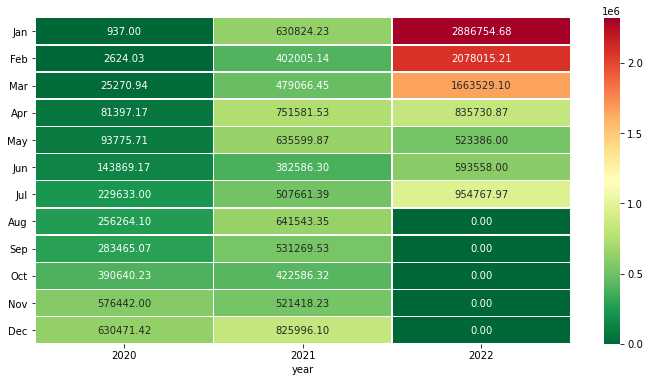

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(df, cmap='RdYlGn_r', robust=True,
                 fmt='.2f', annot=True, linewidths=.5, ax=ax,)                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

В январе 2022 года был максимум новых случаев.

In [24]:
new_cases = world_data_2.new_cases
total_cases = world_data_2.total_cases
new_cases

date
2020-01-22           0.000
2020-01-23         100.000
2020-01-24         287.000
2020-01-25         493.000
2020-01-26         683.000
                  ...     
2022-07-27   1,407,972.000
2022-07-28   1,095,591.000
2022-07-29   1,356,694.000
2022-07-30     574,004.000
2022-07-31     544,149.000
Name: new_cases, Length: 922, dtype: float64

### Новые случаи по всем миру

<AxesSubplot:xlabel='date'>

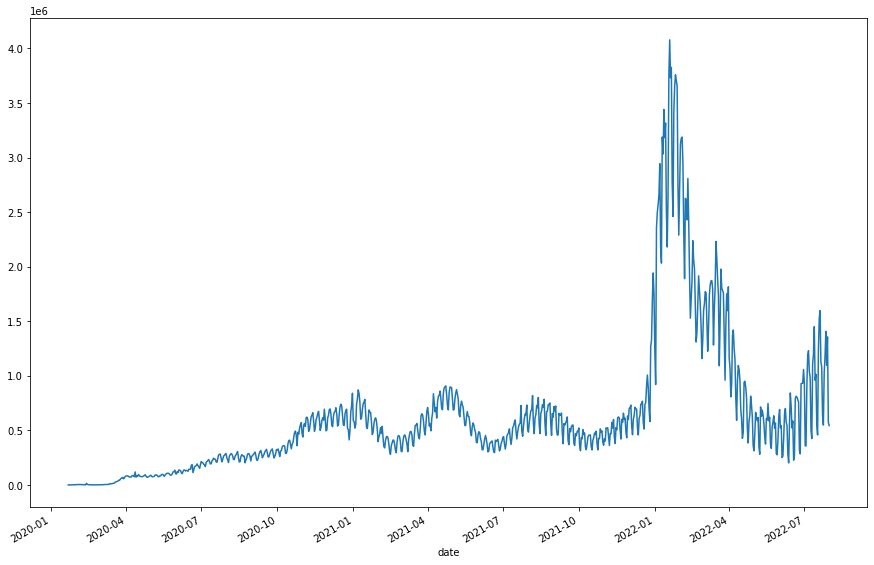

In [25]:
new_cases.plot(figsize=(15,10), x_compat = True)

<AxesSubplot:xlabel='date'>

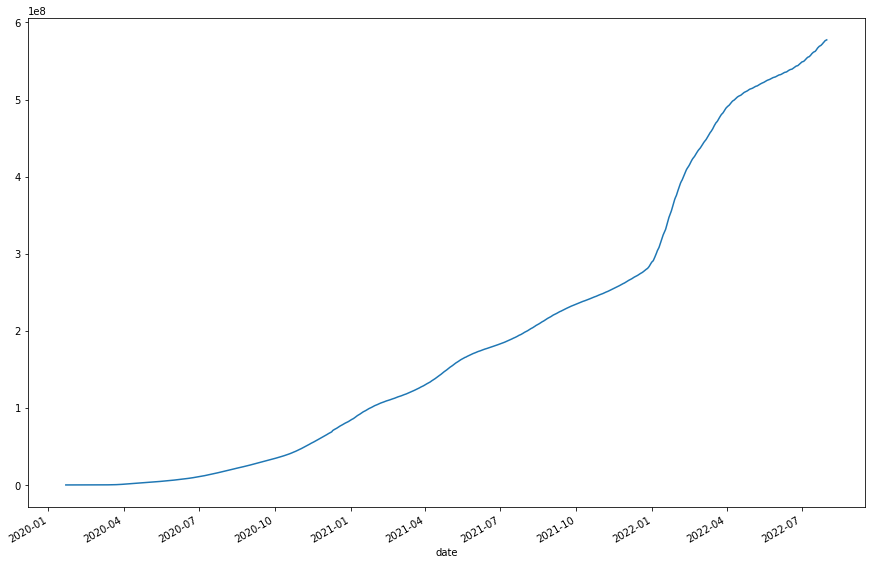

In [26]:
total_cases.plot(figsize=(15,10), x_compat = True)

In [27]:
continent = data[(data['iso_code'].isin(['OWID_AFR','OWID_ASI', 'OWID_EUR','OWID_NAM','OWID_OCE','OWID_SAM']))]
continent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
908,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.000,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,OWID_AFR,NaN,Africa,2020-02-14,1.000,1.000,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,OWID_AFR,NaN,Africa,2020-02-15,1.000,0.000,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,OWID_AFR,NaN,Africa,2020-02-16,1.000,0.000,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,OWID_AFR,NaN,Africa,2020-02-17,1.000,0.000,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175352,OWID_SAM,NaN,South America,2022-07-27,"61,871,039.000","74,664.000","74,510.857","1,313,997.000",334.000,360.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175353,OWID_SAM,NaN,South America,2022-07-28,"61,971,971.000","100,932.000","72,989.714","1,314,629.000",632.000,363.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175354,OWID_SAM,NaN,South America,2022-07-29,"62,035,180.000","63,209.000","70,718.000","1,315,000.000",371.000,363.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175355,OWID_SAM,NaN,South America,2022-07-30,"62,077,712.000","42,532.000","71,529.286","1,315,249.000",249.000,376.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Динамика числа смертей

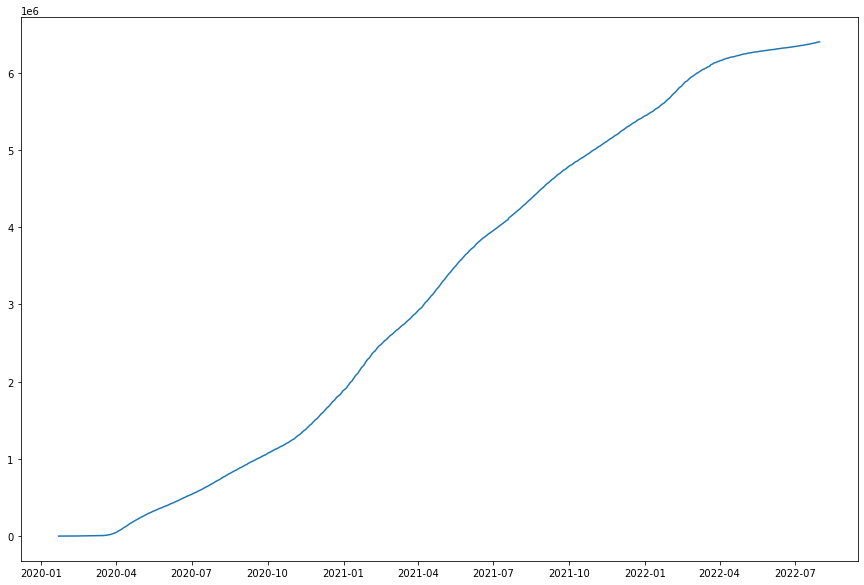

In [41]:
plt.subplots(figsize=(15,10))
x = data.loc[data['location'] == 'World', 'date']
y = data.loc[data['location'] == 'World', 'total_deaths']
plt.plot(x, y)

Самый высокий уровень смертности

In [73]:
df_countries_last_date = data[~data['iso_code'].str.startswith('OWID')].loc[data['date'] == latest_date].sort_values(
    by="total_deaths", ascending=False)
df_countries_last_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
198811,USA,North America,United States,2022-07-31,"91,354,680.000","12,127.000","132,596.714","1,030,272.000",11.000,429.143,...,19.100,24.600,NaN,2.770,78.860,0.926,NaN,NaN,NaN,NaN
27033,BRA,South America,Brazil,2022-07-31,"33,833,900.000","20,313.000","34,649.143","678,514.000",28.000,221.429,...,10.100,17.900,NaN,2.200,75.880,0.765,NaN,NaN,NaN,NaN
87414,IND,Asia,India,2022-07-31,"44,036,275.000","16,464.000","18,664.857","526,396.000",39.000,46.000,...,1.900,20.600,59.550,0.530,69.660,0.645,NaN,NaN,NaN,NaN
156730,RUS,Europe,Russia,2022-07-31,"18,330,786.000","12,341.000","9,814.000","374,683.000",38.000,38.857,...,23.400,58.300,NaN,8.050,72.580,0.824,NaN,NaN,NaN,NaN
122601,MEX,North America,Mexico,2022-07-31,"6,711,847.000",0.000,"12,505.286","327,525.000",0.000,62.286,...,6.900,21.400,87.847,1.380,75.050,0.779,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119865,MHL,Oceania,Marshall Islands,2022-07-31,64.000,0.000,0.714,NaN,NaN,NaN,...,NaN,NaN,82.502,2.700,73.700,0.704,NaN,NaN,NaN,NaN
158331,SHN,Africa,Saint Helena,2022-07-31,4.000,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.560,NaN,NaN,NaN,NaN,NaN
170144,SXM,North America,Sint Maarten (Dutch part),2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.950,NaN,NaN,NaN,NaN,NaN
189368,TKL,Oceania,Tokelau,2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.860,NaN,NaN,NaN,NaN,NaN


проверим страны с самым высоким уровнем смертности по состоянию на июль 2022 года:

In [111]:
top_10_total_deaths = df_countries_last_date.loc[:, ['location','population','total_cases','total_deaths']].sort_values(
    by="total_deaths", ascending=False)[0:10]
top_10_total_deaths.style.background_gradient(cmap='YlOrRd')

,location,population,total_cases,total_deaths
198811,United States,336997624.000000,91354680.000000,1030272.000000
27033,Brazil,214326223.000000,33833900.000000,678514.000000
87414,India,1407563842.000000,44036275.000000,526396.000000
156730,Russia,145102755.000000,18330786.000000,374683.000000
122601,Mexico,126705138.000000,6711847.000000,327525.000000
150330,Peru,33715472.000000,3909870.000000,214303.000000
197870,United Kingdom,67281040.000000,23392406.000000,184140.000000
94691,Italy,59240330.000000,21040025.000000,172086.000000
88315,Indonesia,273753191.000000,6207098.000000,156993.000000
67111,France,67422000.000000,33848327.000000,152052.000000


In [85]:
top_10_total_cases = df_countries_last_date.loc[:, ['location', 'continent', 'population', 
                                                    'total_cases', 'total_deaths']].sort_values(
                                                                        by="total_cases", ascending=False)[0:10]
top_10_total_cases.style.background_gradient()

,location,continent,population,total_cases,total_deaths
198811,United States,North America,336997624.000000,91354680.000000,1030272.000000
87414,India,Asia,1407563842.000000,44036275.000000,526396.000000
67111,France,Europe,67422000.000000,33848327.000000,152052.000000
27033,Brazil,South America,214326223.000000,33833900.000000,678514.000000
71618,Germany,Europe,83408554.000000,30854175.000000,143979.000000
197870,United Kingdom,Europe,67281040.000000,23392406.000000,184140.000000
94691,Italy,Europe,59240330.000000,21040025.000000,172086.000000
176297,South Korea,Asia,51830139.000000,19820739.000000,25068.000000
156730,Russia,Europe,145102755.000000,18330786.000000,374683.000000
192524,Turkey,Asia,84775404.000000,15889495.000000,99341.000000


In [75]:
continents = df_countries_last_date.loc[:, ['location', 'total_cases_per_million', 'population']].sort_values(by='population', ascending = False)[:10]
continents.style.background_gradient()

,location,total_cases_per_million,population
39630,China,635.385000,1425893464.000000
87414,India,31285.455000,1407563842.000000
198811,United States,271084.048000,336997624.000000
88315,Indonesia,22674.066000,273753191.000000
145499,Pakistan,6718.136000,231402116.000000
27033,Brazil,157861.691000,214326223.000000
137972,Nigeria,1222.940000,213401323.000000
16328,Bangladesh,11840.466000,169356251.000000
156730,Russia,126329.690000,145102755.000000
122601,Mexico,52972.177000,126705138.000000


<BarContainer object of 10 artists>

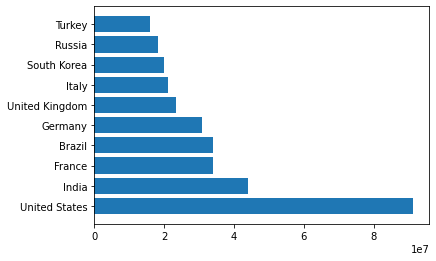

In [110]:
plt.barh(top_10_total_cases['location'], top_10_total_cases['total_cases'])

### Новые случаи смертельного исхода

эволюция сообщений новых случаев о смерти

<AxesSubplot:xlabel='date'>

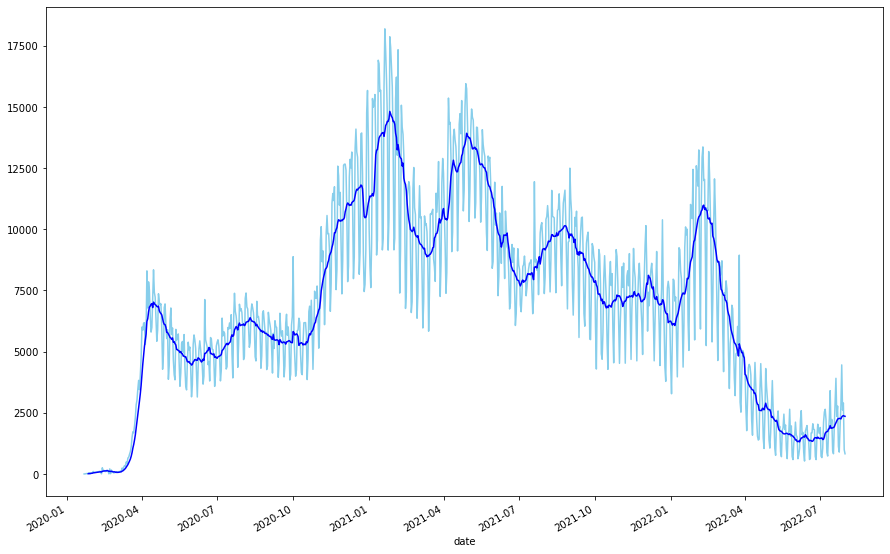

In [122]:
new_cases_deaths = world_data_2.new_deaths


new_cases_deaths.plot(figsize=(15,10), x_compat = True, color="skyblue")
world_data_2.new_deaths_smoothed.plot(color="blue")

### Динамика числа вакцинированных

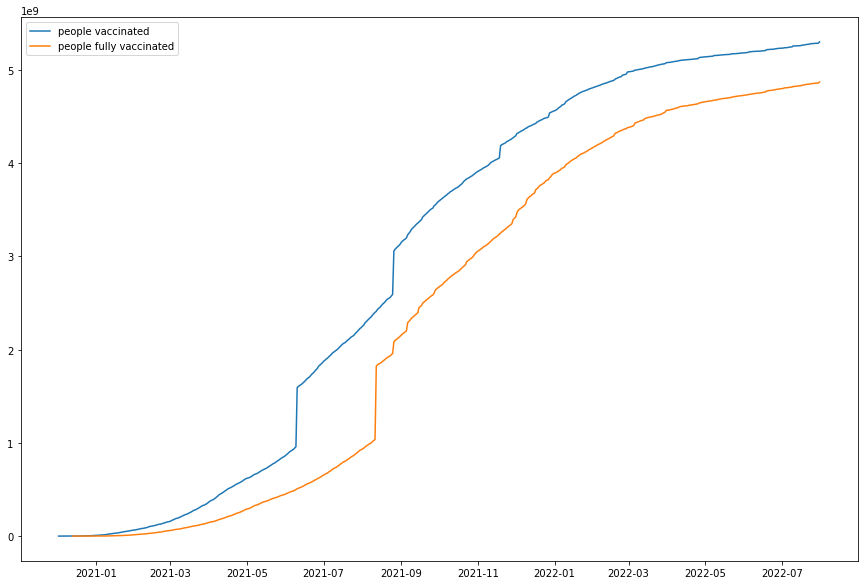

In [130]:
plt.subplots(figsize=(15,10))

plt.plot(data.loc[data['location'] == 'World', 'date'], data.loc[data['location'] == 'World', 'people_vaccinated'])
plt.plot(data.loc[data['location'] == 'World', 'date'], data.loc[data['location'] == 'World', 'people_fully_vaccinated'])
plt.legend(['people vaccinated', 'people fully vaccinated'])

In [144]:
d = data[['people_vaccinated','date']]
d = d[d['people_vaccinated'].isnull()==False].sort_values(by='date', ascending = True)
d[d['people_vaccinated']!=0]

,people_vaccinated,date
61934,1.000,2020-12-04
104052,1.000,2020-12-04
206730,1.000,2020-12-04
82241,1.000,2020-12-04
60994,1.000,2020-12-04
...,...,...
42257,"695,760.000",2022-07-31
41369,"423,255.000",2022-07-31
38689,"18,033,698.000",2022-07-31
152247,"22,749,710.000",2022-07-31


начало вакцинации - 04.12.2020

Первую вакцину от коронавируса Convidicea зарегистрировали в Китае для вакцинации военнослужащих, это произошло 25.06.2020. Первую общедоступную вакцину «Гам-КОВИД-Вак» (Спутник V) зарегистрировали в России 11.08.2020.

Уже в декабре - январе начали массовые вакцинации, что и видно на графике

#### топ 10 вакцинированных

детально рассмотрим и создадим новый фрейм с удалением пустых значений на нули

In [153]:
vaccine_cols = list(columns_per_category['Vaccinations'])

data_for_vaccinations = data.copy(deep = True)

data_for_vaccinations[vaccine_cols] = data_for_vaccinations[vaccine_cols].replace('', np.nan)
data_for_vaccinations.loc[:, vaccine_cols] = data_for_vaccinations.groupby('iso_code')[vaccine_cols].ffill()

data_for_vaccinations_top = data_for_vaccinations[~data_for_vaccinations['iso_code'].str.startswith(
    'OWID')].loc[data_for_vaccinations['date'] == latest_date].sort_values(by="total_deaths", ascending=False)

dfc = data_for_vaccinations_top.loc[:, ['location','continent','population','people_vaccinated']].sort_values(by="people_vaccinated",
                                                                                               ascending=False)[0:10]

dfc.style.background_gradient(cmap = 'BuGn')

,location,continent,population,people_vaccinated
39630,China,Asia,1425893464.000000,1298636000.000000
87414,India,Asia,1407563842.000000,1021327183.000000
198811,United States,North America,336997624.000000,261712689.000000
88315,Indonesia,Asia,273753191.000000,202268728.000000
27033,Brazil,South America,214326223.000000,185208286.000000
145499,Pakistan,Asia,231402116.000000,138206755.000000
16328,Bangladesh,Asia,169356251.000000,130049697.000000
96524,Japan,Asia,124612530.000000,103925704.000000
122601,Mexico,North America,126705138.000000,92333818.000000
205722,Vietnam,Asia,97468028.000000,87717272.000000
